# A small 1D pic without Poisson
To try out the fake R model

In [4]:
#import
import numpy as np
import scipy as sp
import astropy
from imp import reload

import matplotlib.pyplot as plt
%matplotlib inline

import src

from src.plasma import plasma

from src.functions import generate_maxw, velocity_maxw_flux

reload(src.plasma)
reload(src.functions)

from ipywidgets import IntProgress as prog
from IPython.display import display
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [ ]:
#parameters
Lx = 1e-2 #System length
dX = 1e-5 #dX in m
Nx = int(Lx/dX)+1 #cell number
Lx = Nx*dX
print("Nx = {Nx}, and Lx = {Lx} cm".format(Nx = Nx, Lx = Lx*100))

Npart = 50*Nx #particles number, in particle par cell
n = 1e17  #[m^-3]
dT = 1e-12 #time step
Te = 20;     #[eV] Electron distribution temperature
Ti = 5 #[eV]

me = 9.109e-31; #[kg] electron mass
q = 1.6021765650e-19; #[C] electron charge
kb = 1.3806488e-23;  #Blozman constant
eps_0 = 8.8548782e-12; #Vaccum permitivitty
mi = 131*1.6726219e27 #[kg]

L_De = np.sqrt(eps_0*Te/(q*n))

dT = 1e-10 #time step

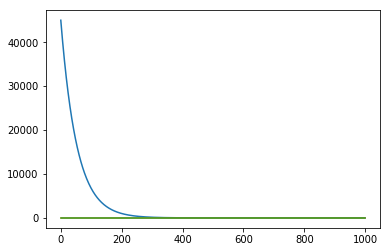

In [7]:
#Generate plasma
pla = plasma(dT,Nx,Lx,Npart,n,Te,Ti)
#fix Electric field profile
pla.E[:,0] = 45e3*np.exp(-pla.x_j/(5*L_De))
#pla.compute_rho()
plt.plot(pla.E)
plt.show()
#plt.plot(pla.rho)
#plt.show()

 
*** Profile stats marshalled to file '/tmp/tmp_iuoss19'. 


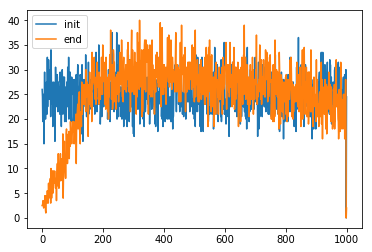

In [8]:
%%snakeviz

#plt.hist(pla.ele.x,label="start",bins=Nx);
Nt = 100
n_av = 100
a = 1.2
pla.compute_rho()
plt.plot(pla.ne,label = "init");

for i in np.arange(Nt):
    pla.pusher()
    pla.boundary()
    
    pla.compute_rho()
    
    
    #We need to had boundary
    if i > 1 and i%n_av ==0:
        ie = pla.history["Ie_w"][-n_av:]
        ii = pla.history["Ii_w"][-n_av:]
        if ie > ii :
            print(i,"times a")
            pla.E[:,0] *= a
        else:
            print(i,"divied by a")
            pla.E[:,0] /= a
    
plt.plot(pla.ne,label = "end");
plt.legend()

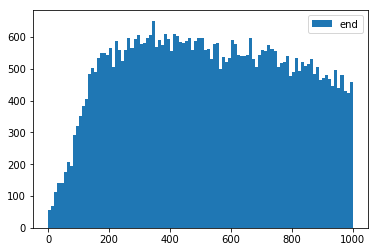

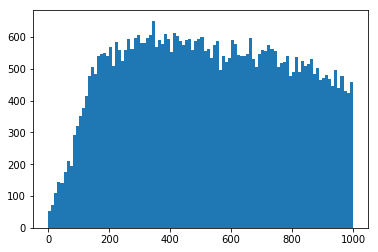

[ 0.  0.  0. ...,  0.  0.  0.]


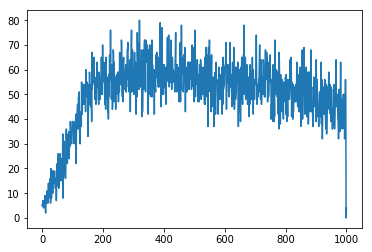

In [9]:
plt.hist(pla.ele.x/pla.dx ,label="end",bins=100);

plt.legend()
plt.show()

x = np.empty(pla.ele.Npart)
for i in np.arange(pla.ele.Npart):
    x[i] = pla.ele.returnindex(pla.ele.x[i])

plt.hist(x ,label="end",bins=100);

plt.show()

n = np.zeros(len(pla.x_j))
print(n)
for i in np.arange(pla.ele.Npart):
    
    j = pla.ele.returnindex(pla.ele.x[i])
    deltax = pla.x_j[j] - pla.ele.x[i]
    n[j-1] += (1 - deltax)
    n[j] += (deltax)
    
    

plt.plot(pla.ele.return_density(pla.x_j))

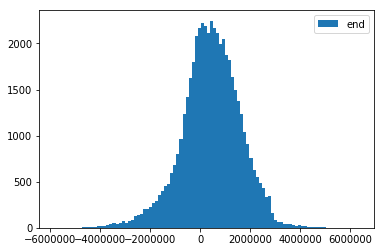

In [10]:
plt.hist(pla.ele.V[:,0],label="end",bins=100);
plt.legend()